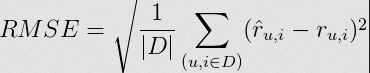RMSE (ROOT MEAN SQUARE ERROR)
[Текст ссылки](https://makesomecode.me/images/2018/rmse.png)

ratings_df = pd.read_csv("ml-latest-small/ratings.csv")

r"\U"

In [38]:
import numpy as np
import pandas as pd

ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
print('Unique users count: {}'.format(len(ratings_df['userId'].unique())))
print('Unique movies count: {}'.format(len(ratings_df['movieId'].unique())))
print('DataFrame shape: {}'.format(ratings_df.shape))

ratings_df.head()

Unique users count: 610
Unique movies count: 9724
DataFrame shape: (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
n = 95000
ratings_df_sample = ratings_df[:n]
n_users = len(ratings_df_sample["userId"].unique())
n_movies = len(ratings_df_sample["movieId"].unique())

(n_users, n_movies)

(552, 8751)

In [37]:
movies = ratings_df["movieId"].unique()

def scale_movie_id(movie_id):
  scaled = np.where(movie_id == movie_id)[0][0] + 1
  return scaled
ratings_df['movieId']=ratings_df['movieId'].apply(scale_movie_id)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,1,4.0,964981247
2,1,1,4.0,964982224
3,1,1,5.0,964983815
4,1,1,5.0,964982931


In [ ]:
ratings_df_sample.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [16]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(ratings_df, test_size = 0.25)

print('Train shape: {}'.format(train_dataset.shape))
print('Test shape: {}'.format(test_dataset.shape))

Train shape: (75627, 4)
Test shape: (25209, 4)


In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt


def rmse(prediction, ground_truth):
    prediction = np.nan_to_num(prediction)[ground_truth.nonzero()].flatten()
    ground_truth = np.nan_to_num(ground_truth)[ground_truth.nonzero()].flatten()

    mse = mean_squared_error(prediction, ground_truth)
    return sqrt(mse)

train_data_matrix = np.zeros((n_users, n_movies))
for line in train_dataset.itertuples():
  train_data_matrix[line[1]-2, line[2]-2]=line[3]

test_data_matrix = np.zeros((n_users, n_movies))
for line in test_dataset.itertuples():
    test_data_matrix[line[1] - 1, line[2] - 1] = line[3]


In [39]:
movies_df = pd.read_csv("ml-latest-small/movies.csv")
data_df = pd.merge(ratings_df, movies_df, on = "movieId")
data_df.drop("timestamp", 1, inplace=True)
data_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [40]:
data_df.groupby("title")["rating"].mean().sort_values(ascending=False)
#средний рейтинг

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [41]:
#Рейтинг
data_df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [53]:
ratings = pd.DataFrame(data_df.groupby("title")["rating"].mean())

ratings['Num of ratings'] = pd.DataFrame(data_df.groupby("title")["rating"].count())

ratings.head()

,rating,Num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


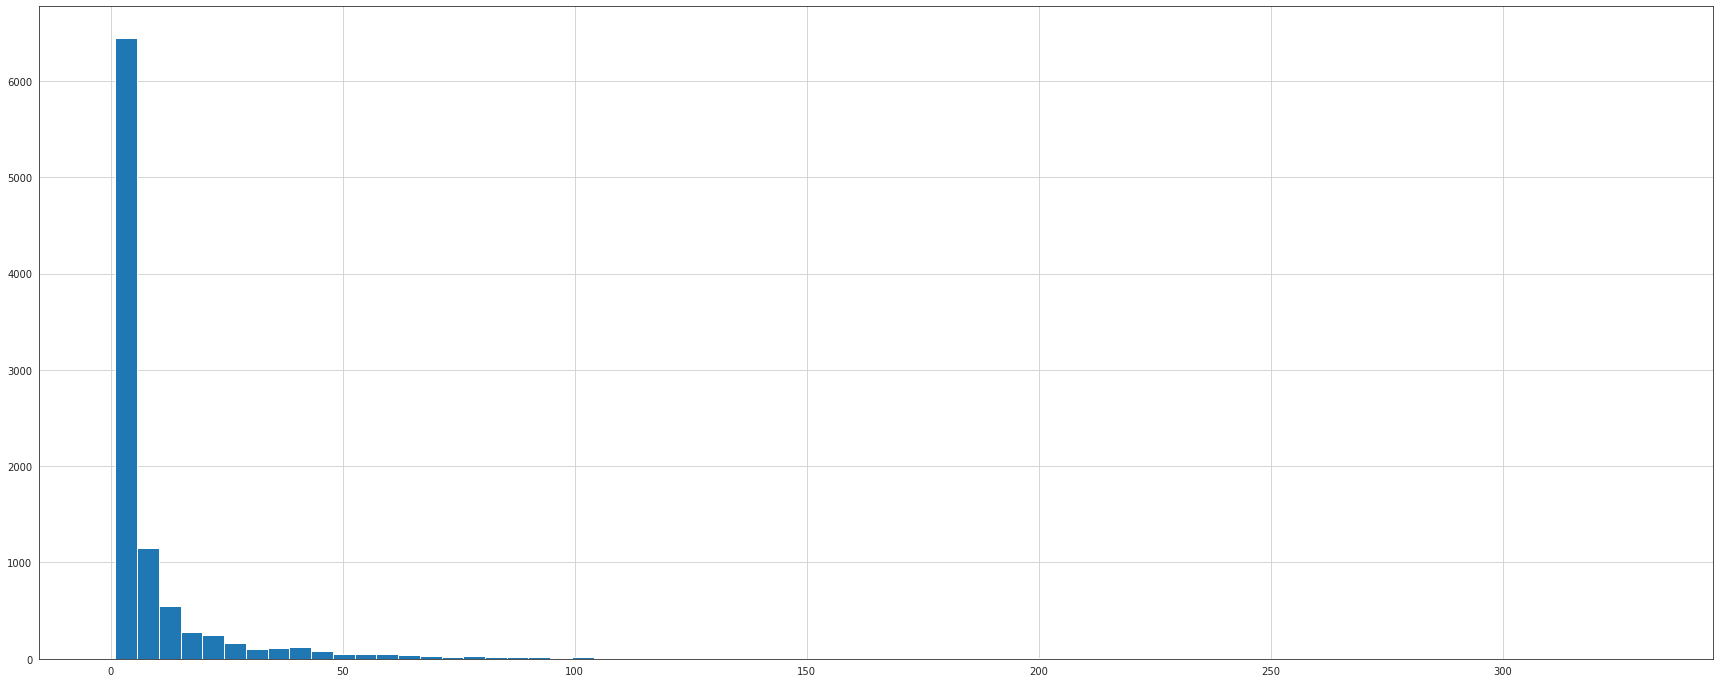

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("white")
%matplotlib inline

b = plt.figure(figsize = (30, 12))

ratings["Num of ratings"].hist(bins = 70)

<Figure size 2160x864 with 0 Axes>

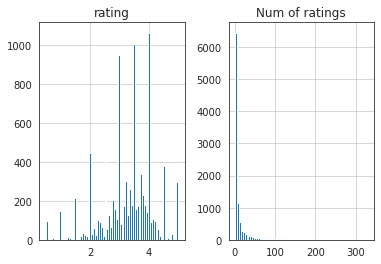

In [44]:
k = plt.figure(figsize=(30, 12))
ratings.hist(bins=70)
plt.show(k)

In [47]:
moviemat = data_df.pivot_table(index ='userId',columns ='title', values ='rating')
 
moviemat.head()

ratings.sort_values("Num of ratings", ascending = False).head(25) 

,rating,Num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [48]:
starwars_user_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']

liarliar_user_ratings = moviemat['Liar Liar (1997)']

  
starwars_user_ratings.head() 

userId
1    5.0
2    NaN
3    NaN
4    5.0
5    NaN
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [57]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head() 

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning:

divide by zero encountered in true_divide



,Correlation
title,
"'burbs, The (1989)",0.155161
(500) Days of Summer (2009),0.024299
*batteries not included (1987),-0.269069
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),0.360885


In [56]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)
corr_starwars = corr_starwars.join(ratings["Num of ratings"])
corr_starwars.head()
corr_starwars[corr_starwars['Num of ratings']>100].sort_values('Correlation', ascending = False).head() 

ValueError: ignored

In [ ]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])

corr_liarliar.dropna(inplace = True)

  

corr_liarliar = corr_liarliar.join(ratings['Num if ratings'])

corr_liarliar[corr_liarliar['Num if ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,Num if ratings
title,,
Men in Black (a.k.a. MIB) (1997),0.545958,144
"Mask, The (1994)",0.542268,132
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.510183,180
"Beautiful Mind, A (2001)",0.507051,111
Star Wars: Episode I - The Phantom Menace (1999),0.490035,119


!pip install numpy
!pip install scikit-surprise

conda install -c conda-forge scikit-surprise

In [58]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 8.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619414 sha256=1657b5fcbb8073e499e12f3c37914cdc10697e0e6d153a0ab4151f14394229ae
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [59]:
import os
import pandas as pd
import numpy as np
from surprise import *
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict
from surprise import accuracy


# Новый раздел

In [3]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip && unzip ml-latest-small.zip



--2021-12-14 13:22:18--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K  2.68MB/s    in 0.3s    

2021-12-14 13:22:19 (2.68 MB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [64]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")

In [65]:
ratings_df.drop("timestamp", 1, inplace=True)

ratings_df.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [72]:
reader = Reader(line_format='user item rating', sep="\t")
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df, reader)

In [67]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))



In [27]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

data = ratings_df["rating"].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / ratings_df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(ratings_df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [71]:
configure_plotly_browser_state()


data = ratings_df.groupby('movieId')['rating'].count().clip(upper=50)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Item (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
!pip install plotly

In [69]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [73]:
param_grid = {'n_factors': [25, 30, 35, 40], 'n_epochs': [15, 20, 25], 'lr_all': [0.001, 0.003, 0.005, 0.008],
              'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

0.8680628411723413
{'n_factors': 40, 'n_epochs': 25, 'lr_all': 0.008, 'reg_all': 0.08}




0.8682637035412882
{'n_factors': 35, 'n_epochs': 25, 'lr_all': 0.008, 'reg_all': 0.08}



In [74]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD(n_factors=40, n_epochs=25, lr_all=0.008, reg_all=0.08)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)


RMSE: 0.8649


0.8649498092566704

In [75]:


def get_Iu(uid):
    """ 
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ 
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)



In [76]:
df_predictions.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,448,2990,4.5,2.936881,{'was_impossible': False},1373,16,1.563119
1,227,48774,4.5,4.194670,{'was_impossible': False},76,53,0.305330
2,414,6012,2.0,3.279669,{'was_impossible': False},2004,1,1.279669
3,222,1997,2.5,3.603458,{'was_impossible': False},190,39,1.103458
4,391,3994,1.0,3.483860,{'was_impossible': False},285,52,2.483860


In [77]:


best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]



In [78]:


temp = ratings_df.loc[ratings_df['movieId'] == 3996]['rating']
configure_plotly_browser_state()

# Create trace
trace = go.Histogram(x = temp.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 5, size=.3))
 # Create layout
layout = go.Layout(title = 'Number of ratings item 3996 has received',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)



In [79]:
final = []

for threshold in np.arange(0, 5.5, 0.5):
  tp=0
  fn=0
  fp=0
  tn=0
  temp = []

  for uid, _, true_r, est, _ in predictions:
    if(true_r>=threshold):
      if(est>=threshold):
        tp = tp+1
      else:
        fn = fn+1
    else:
      if(est>=threshold):
        fp = fp+1
      else:
        tn = tn+1   

    if tp == 0:
      precision = 0
      recall = 0
      f1 = 0
    else:
      precision = tp / (tp + fp)
      recall = tp / (tp + fn)
      f1 = 2 * (precision * recall) / (precision + recall)  

  temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
  final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

,threshold,tp,fp,tn,fn,Precision,Recall,F1
0,0.0,25209,0,0,0,1.000000,1.000000,1.000000
1,0.5,25209,0,0,0,1.000000,1.000000,1.000000
2,1.0,24834,375,0,0,0.985124,1.000000,0.992506
3,1.5,24154,1040,6,9,0.958720,0.999628,0.978747
4,2.0,23630,1392,99,88,0.944369,0.996290,0.969635
5,2.5,21347,2613,689,560,0.890943,0.974437,0.930822
6,3.0,18205,2366,2328,2310,0.884984,0.887399,0.886190
7,3.5,10784,2614,7040,4771,0.804896,0.693282,0.744931
8,4.0,3991,863,12089,8266,0.822208,0.325610,0.466484
9,4.5,458,177,19551,5023,0.721260,0.083561,0.149771


In [80]:


def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [81]:


results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.9573770491803278, 'Recall': 0.1691889560811497},
 {'K': 3, 'Precision': 0.9519125683060112, 'Recall': 0.24795776847442394},
 {'K': 4, 'Precision': 0.9474043715846994, 'Recall': 0.3175124099241589},
 {'K': 5, 'Precision': 0.9386338797814215, 'Recall': 0.376083594138336},
 {'K': 6, 'Precision': 0.9350819672131138, 'Recall': 0.42961057860401697},
 {'K': 7, 'Precision': 0.9329742388758768, 'Recall': 0.47450305163723266},
 {'K': 8, 'Precision': 0.9329742388758779, 'Recall': 0.513943401618055},
 {'K': 9, 'Precision': 0.929604475670051, 'Recall': 0.5475601558261324},
 {'K': 10, 'Precision': 0.926180067655476, 'Recall': 0.5766066965792146}]

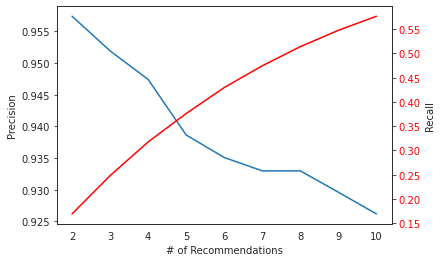

In [82]:


Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')
    ###



In [83]:
trainset = data.build_full_trainset()   #Build on entire data set
algo = SVD(n_factors=35, n_epochs=25, lr_all=0.008, reg_all=0.08)
algo.fit(trainset)

# Predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

#Predicting the ratings for testset
predictions = algo.test(testset)

In [84]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n



In [85]:
all_pred = get_all_predictions(predictions)

In [86]:
n = 4

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [87]:


tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()



In [88]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [111]:
results = get_predictions(2)
results

0      (3451, 4.457725507722356)
1    (177593, 4.434712086052662)
2      (1178, 4.420402161866563)
3       (3266, 4.41641459253292)
Name: 2, dtype: object

In [112]:
recommended_movie_ids=[]
for x in range(0, n):
    recommended_movie_ids.append(results[x][0])

recommended_movie_ids

[3451, 177593, 1178, 3266]

In [113]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]


In [114]:
recommended_movies


,movieId,title,genres
883,1178,Paths of Glory (1957),Drama|War
2453,3266,Man Bites Dog (C'est arrivé près de chez vous)...,Comedy|Crime|Drama|Thriller
2582,3451,Guess Who's Coming to Dinner (1967),Drama
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama


In [115]:


temp = ratings_df[ratings_df['userId'] == 2].sort_values("rating", ascending = False)
temp.head()



,userId,movieId,rating
260,2,131724,5.0
259,2,122882,5.0
254,2,106782,5.0
250,2,89774,5.0
241,2,60756,5.0


In [107]:
temp.shape

(46, 3)

In [116]:
history_movie_ids = temp['movieId']
user_history = movies[movies['movieId'].isin(history_movie_ids)]

In [117]:
user_history[:n]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
291,333,Tommy Boy (1995),Comedy
1284,1704,Good Will Hunting (1997),Drama|Romance
2674,3578,Gladiator (2000),Action|Adventure|Drama


In [118]:


recommended_movies



,movieId,title,genres
883,1178,Paths of Glory (1957),Drama|War
2453,3266,Man Bites Dog (C'est arrivé près de chez vous)...,Comedy|Crime|Drama|Thriller
2582,3451,Guess Who's Coming to Dinner (1967),Drama
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
